In [1]:
from __future__ import print_function, division
from sympy import *
import ast
import numpy as np
import matplotlib.pyplot as plt
#from brokenaxes import brokenaxes
#from numba import jit

### load parameters

In [2]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [3]:
name = "free_energy_def.dat"
tmp = open(name, "r")
tmp=tmp.read()
exec(tmp)

In [4]:
name = "assign_symbols_final.dat"
tmp = open(name, "r")
tmp=tmp.read()
exec(tmp)

In [5]:
w_array = np.loadtxt("w_array.dat")

In [6]:
len(w_array[0])

257

In [7]:
name = "ML_parameter.dat" #load n_conv, con_dim,kill (killsmall)
tmp = open(name, "r")
tmp=tmp.read()
exec(tmp)
kill=float(kill)
print(n_parameter,conv_dim,n_conv,kill)

0 257 3 0.05


In [8]:
data_file = '../HR_data/'
f=np.loadtxt(data_file+"parameter.dat")
L = float(f[0])
N = int(f[1])
dx = (L/N)
print(N,L,dx)

1024 32.0 0.03125


In [9]:
#for i in range (len(w_array)):
#    w_array[i][0:int(2//dx)]=0
#    w_array[i][conv_dim-int(2//dx):conv_dim]=0
    

/home/sam/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


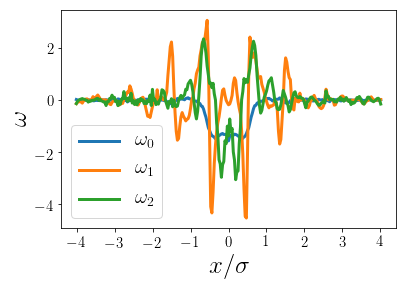

In [10]:
x=np.linspace(-conv_dim*dx/2,conv_dim*dx/2,conv_dim)
for i in range (n_conv):
    plt.plot(x,w_array[i],linewidth=3,label=r"$\omega_{"+str(i)+"}$")
plt.legend(fontsize=20)
plt.xlabel(r"$x/\sigma$",fontsize=25)
plt.ylabel(r"$\omega$",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(np.linspace(-4,2,4),fontsize=15)
#plt.xlim([-4,4])
#plt.ylim([np.min(w_array)-0.05,0.8])
#plt.text(-6.5,1,r"$(a)$",fontsize=25)
plt.savefig("whr.eps",format="eps",bbox_inches='tight')

In [11]:
fed_eqn

<function __main__.fed_eqn>

In [12]:
fed_eqn()

a2L3*(a1L10*n1 + a1L11*n2 + a1L9*n0)*(a1L12*n0 + a1L13*n1 + a1L14*n2) + a2L4*(a1L15*n0 + a1L16*n1 + a1L17*n2)*(a1L18*n0 + a1L19*n1 + a1L20*n2) + a2L5*(a1L21*n0 + a1L22*n1 + a1L23*n2)*(a1L24*n0 + a1L25*n1 + a1L26*n2) + a2L6*(a1L27*n0 + a1L28*n1 + a1L29*n2)/(a1L30*n0 + a1L31*n1 + a1L32*n2 + 1) + (a2L21*(a1L0*n0 + a1L1*n1 + a1L2*n2) + a2L22*(exp(a1L3*n0 + a1L4*n1 + a1L5*n2) - 1) + a2L23*log(a1L6*n0 + a1L7*n1 + a1L8*n2 + 1) + a2L24*(a1L10*n1 + a1L11*n2 + a1L9*n0)*(a1L12*n0 + a1L13*n1 + a1L14*n2) + a2L25*(a1L15*n0 + a1L16*n1 + a1L17*n2)*(a1L18*n0 + a1L19*n1 + a1L20*n2) + a2L26*(a1L21*n0 + a1L22*n1 + a1L23*n2)*(a1L24*n0 + a1L25*n1 + a1L26*n2) + a2L27*(a1L27*n0 + a1L28*n1 + a1L29*n2)/(a1L30*n0 + a1L31*n1 + a1L32*n2 + 1))*(a2L28*(a1L0*n0 + a1L1*n1 + a1L2*n2) + a2L29*(exp(a1L3*n0 + a1L4*n1 + a1L5*n2) - 1) + a2L30*log(a1L6*n0 + a1L7*n1 + a1L8*n2 + 1) + a2L31*(a1L10*n1 + a1L11*n2 + a1L9*n0)*(a1L12*n0 + a1L13*n1 + a1L14*n2) + a2L32*(a1L15*n0 + a1L16*n1 + a1L17*n2)*(a1L18*n0 + a1L19*n1 + a1L20*n2) 

In [13]:
name = "all_parameter_2.dat" #parameters after step 3  
tmp = open(name, "r")
tmp=tmp.read()
#print(tmp)
tmp=tmp.replace("/varible:0",":")
tmp=tmp.replace("/const_1:0",":")

for i in range(100):
    tmp=tmp.replace("_"+str(i),"")
tmp=tmp.replace("[[","")
tmp=tmp.replace("]]","")
tmp=tmp.replace("\n",",")
tmp=tmp.replace(":","\":")
tmp=tmp.replace(",",",\"")
tmp="{\""+tmp+"}"
tmp=tmp.replace(",\"}","}")
#print(tmp)
dict_all=ast.literal_eval(tmp)

In [14]:
#kill small parameters. 
#The clamp is applied by extra layre so the output parameters will keep the value instead of zero.  

kill_small=0  
for i in list(dict_all.keys()):
    if(np.abs(dict_all[i])<kill and i[0]=="a"):
        dict_all[i]=0
        kill_small+=1
print(len(dict_all.keys()),kill_small)

101 72


In [15]:
input_symbols = fed_eqn().subs(dict_all).free_symbols

In [16]:
 fed_eqn().subs(dict_all)

0.00654133140255294*n0**4 + 0.0462412918218647*n0**2 + (0.161781265030843*n0**2 + 0.106113598279807*n0*(0.3755026*n0 + 0.19980009*n2) - 0.116558247927878*n2**2)/(-0.237885061906037*n0**2 - 0.226176124291155*n0*(0.3755026*n0 + 0.19980009*n2) - 0.058328974084845*n0 + 0.027728882135139*n1 + 0.010239551950332*n2 + 0.16832675*exp(0.5887096*n1) + 0.83167325) + (-0.16561210369308*n0**2 - 0.120604718416679*n0*(0.3755026*n0 + 0.19980009*n2) - 0.31341228*exp(0.5887096*n1) + 0.31341228)*(-0.0404331964505786*n0**2 + 0.42021739093909*n0 - 0.199766217172558*n1 + 0.14701210456486*n2**2 - 0.073768446513304*n2) + exp(0.0789905500777271*n0**2) + log(0.0421957854693922*n0**2 + 1) - 1

In [17]:
input_str = "["
for i in range(n_parameter):
    input_str+="seps"+str(i)+","
for i in range(n_conv):
    input_str+="sn"+str(i)+","
input_str += "]"
tmp = "input_str="+input_str
exec(tmp)

In [18]:
[input_str]

[[n0, n1, n2]]

In [19]:
fd = lambdify(input_str,fed_eqn().subs(dict_all))

In [20]:
fd

<function numpy.<lambda>>

### $\frac{\partial f}{\partial n}$

In [21]:
for i in range(n_conv):
    eqn_str = "fd_n"+str(i)+" =lambdify(input_str,diff(fed_eqn(),sn"+str(i)+").subs(dict_all))"
    print(eqn_str)
    exec(eqn_str)

fd_n0 =lambdify(input_str,diff(fed_eqn(),sn0).subs(dict_all))
fd_n1 =lambdify(input_str,diff(fed_eqn(),sn1).subs(dict_all))
fd_n2 =lambdify(input_str,diff(fed_eqn(),sn2).subs(dict_all))


In [22]:
fd

<function numpy.<lambda>>

In [23]:
fd_n0

<function numpy.<lambda>>

In [24]:
n_array = np.zeros([n_conv,N])

 ### $n_i=\rho\otimes \omega_i$ (convolution)

In [25]:
#@jit
def conv (rho,w,flip):
    LLw = int((conv_dim-1)/2)
    #print(LLw)
    rho_pad=np.copy(rho)
    rho_tile=np.tile(rho_pad,3)
    rho_pad=rho_tile[N-LLw:2*N+LLw]
    if(flip==1):
        n = np.correlate(rho_pad,np.flip(w))        
        #n = np.flip(np.correlate(np.flip(rho_pad),w))-np.correlate(rho_pad,np.flip(w))
    else:
        n = np.correlate(rho_pad,w)
    return n*dx

## $\frac{\delta F}{\delta \rho}=\sum_{i} \frac{\partial f}{\partial n} \ast \omega_i$ 

if $n$ use convolution then $\frac{\delta F}{\delta \rho}$ use cross correlation, and vic versa.

In [26]:
#@jit
def cal_df(rho,w):
    
    n_array = np.zeros([n_conv,N])
    n1=np.zeros(N)
    tmp=""
    for i in range(n_conv):
        n_array[i]=conv(rho,w[i],1)

    #print(n_array)
    input_str="("
    for i in range(n_conv):
        input_str+="n_array["+str(i)+"]"
        if(i!=n_conv-1):
            input_str+=","
    input_str += ")"
    #print(input_str)
    c1=0
    for i in range(n_conv):
        string = "fd_n"+str(i)+input_str
        fn=eval(string)
        c1+=conv(fn,w[i],0)
    
    fed = "fd"+input_str
    #print(fed)
    fed = eval(fed)
    
    return c1,fed

### picard mixing parameter method
not fast enough for 3D, but good enough here

In [27]:
#@jit
def picard(rho,Vext,w,alpha=10**-3,mu=0,N_fix=False):
    c1 = cal_df(rho,w)[0]
    rho_new = np.exp(-c1-Vext)
    if(N_fix==True):
        mu=np.log(np.sum(rho)/np.sum(rho_new))
    rho_new*=np.exp(mu)
    rho=(1-alpha)*rho+alpha*rho_new
    error=np.mean((rho_new-rho)**2)
    return rho,error

### load test data

In [28]:
data_file = '../HR_data_test/'
f = open(data_file+'/rho_z.dat', 'r')
MC_inform = f.read().splitlines()
for i in range(len(MC_inform)):
    #print(MC_inform[i])
    MC_inform[i]=MC_inform[i].split("\t")


In [29]:

#MC_inform
#i=np.random.randint(0,32)
i=10 #as in the papaer
print(MC_inform[i])
print("i=",i)
Vext = np.loadtxt(data_file+'/Vext_'+str(i)+'.dat')
rho_test = np.loadtxt(data_file+'/rho_'+str(i)+'.dat')
mu = np.log(float(MC_inform[i][2]))
eps = 0

#mu=0.22182268
#eps=2

alpha=10**-3
rho=np.full(N,np.mean(rho_test))
error_array=[]
threshold=10**-6
for i in range(100000):
    rho,error=picard(rho,Vext,w_array,alpha,mu)
    error_array+=[error]
    if(i%1000==0):
        print(error)
    if(error<threshold):
        break

['10', '0.4856603', '2.000397120483881']
i= 10
0.0794622536708116
0.0017864496102814468
0.0002901369642576686
5.350413548113005e-05
9.925218531200633e-06
1.8271395962309108e-06


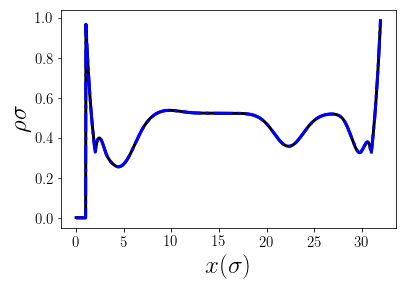

In [30]:
x=np.linspace(0,L-dx,N)
plt.plot(x,rho,"k-",lw=3,label="ground truth")
plt.plot(x,rho_test,"b-.",lw=3,ms=2,label="ML")
#plt.legend()
plt.ylabel(r"$\rho\sigma$",fontsize=25)
plt.xlabel(r"$x(\sigma)$",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title(r"$\rho_0\sigma=0.43$",fontsize=25)
plt.savefig("rho_HR_inside.eps",format="eps",bbox_inches='tight')

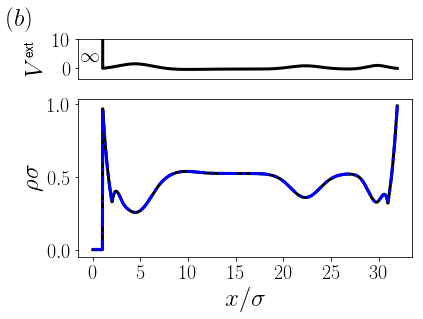

In [31]:
grid = plt.GridSpec(4, 1, wspace=0.4, hspace=0.5)
plt.subplot(grid[0, 0])

plt.text(-1.2,2,r"$\infty$",fontsize=20)
plt.plot(x,Vext,"k-",lw=3)
plt.ylim([-4,10])

plt.text(-9,15,r"$(b)$",fontsize=25)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.yticks(fontsize=20)

plt.ylabel(r"$V^{\mbox{\large  ext}}$",fontsize=25)

plt.subplot(grid[1:, 0])
plt.plot(x,rho_test,"k-",lw=3,label="ground truth")
plt.plot(x,rho,"b-.",lw=3,ms=2,label="ML")
#plt.legend()
plt.ylabel(r"$\rho\sigma$",fontsize=25)
plt.xlabel(r"$x/\sigma$",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks([0,0.5,1.0],fontsize=20)
plt.savefig("rho_HR_inside.eps",format="eps",bbox_inches='tight')

### $P=\frac{-\Omega}{L}=\frac{-F+\mu\int\rho}{L}=f-\mu\rho$
The exact $P^{HR}=\frac{\rho}{1-\rho}$

In [32]:
def eos(rho0,w):
    rho=np.full(N,rho0)
    c1,f=cal_df(rho,w)
    p=f-rho*c1
    return -p[0]+rho0 #rho0 is ideal gas contribution 

In [33]:
rho0_array=np.linspace(0,0.9,100)
rho0_array1=np.linspace(0,0.9,20)

P_ML=np.zeros(len(rho0_array1))
for i in range (len(P_ML)):
    P_ML[i]=eos(rho0_array1[i],w_array)

max(P_ML)

8.492240389682113

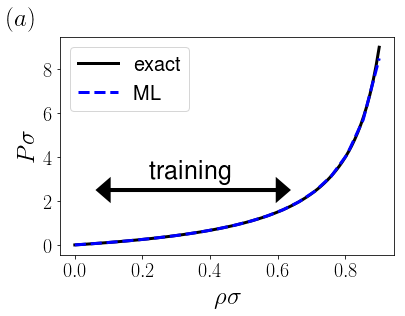

In [34]:
plt.plot(rho0_array,rho0_array/(1-rho0_array),"k-",linewidth=3,label="exact")
plt.plot(rho0_array1,P_ML,"b--",linewidth=3,label="ML")
plt.legend(fontsize=20)
plt.arrow(0.1, 2.5, 0.5, 0, head_width=0.8, head_length=0.03, linewidth=4, color='k')
plt.arrow(0.6, 2.5, -0.5, 0, head_width=0.8, head_length=0.03, linewidth=4, color='k')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.text(0.22,3,"training",fontsize=25)
plt.ylabel(r"$P\sigma$",fontsize=25)
plt.xlabel(r"$\rho\sigma$",fontsize=25)
plt.text(-0.2,10,r"$(a)$",fontsize=25)
plt.savefig("PHR.eps",format="eps",bbox_inches='tight')

In [35]:
def mu_FMT (rho):
    R=0.5
    return (2*R*rho)/(1 - 2*R*rho) - np.log(1 - 2*R*rho)+np.log(rho)
    
    

In [36]:
rho0_array=np.linspace(0.01,0.9,100)
mu_ML=np.zeros(len(rho0_array))
for i in range (len(mu_ML)):
    mu_ML[i]=(cal_df(np.full(N,rho0_array[i]),w_array)[0])[0]+np.log(rho0_array[i])

In [37]:
rho0_FMT=np.linspace(0.01,0.9,100)
mu_FMT_array=mu_FMT(rho0_FMT)

Text(0.5, 0, '$\\rho\\sigma$')

/home/sam/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


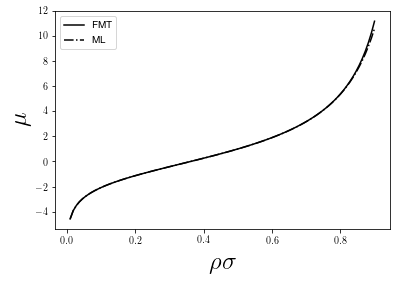

In [38]:
plt.plot(rho0_FMT,mu_FMT_array,"k-",label="FMT")
plt.plot(rho0_array,mu_ML,"k-.",label="ML")
plt.legend()
plt.ylabel(r"$\mu$",fontsize=25)
plt.xlabel(r"$\rho\sigma$",fontsize=25)

### load test data (extrapolation)
$\rho_0>0.8$ is unstable by the exact functional with this spacial resolution. 

In [39]:
data_file = '../HR_data_wall/'

f = open(data_file+'/rho_z.dat', 'r')
MC_inform = f.read().splitlines()
for i in range(len(MC_inform)):
    print(MC_inform[i])
    MC_inform[i]=MC_inform[i].split("\t")


0	0.5	2.718281828459045
1	0.55	4.149106117565329
2	0.6	6.722533605507095
3	0.65	11.895760374043515
4	0.7	24.061936503093442
5	0.75	60.256610769563025
6	0.8	218.3926001325772


In [40]:
i=6
#rho_wall = np.loadtxt('LJ_data_fuzzy/LJ_python_wall/wall_mu_2_eps_2_MC.dat')
#Vext_wall = np.loadtxt('LJ_data_fuzzy/LJ_python_wall/wall_Vext.dat')
Vext = np.loadtxt(data_file+'/Vext_'+str(i)+'.dat')
rho_test = np.loadtxt(data_file+'/rho_'+str(i)+'.dat')
print("i=",i)
print(MC_inform[i])
mu = np.log(float(MC_inform[i][2]))
print("mu=",mu)
print("rho0=",float(MC_inform[i][1]))

#mu=0.22182268
#eps=2

alpha=10**-3
rho=np.full(N,0.5)
error_array=[]
threshold=10**-6
for i in range(100000):
    rho,error=picard(rho,Vext,w_array,alpha,mu)
    error_array+=[error]
    if(i%1000==0):
        print(error)
    if(error<threshold):
        break

i= 6
['6', '0.8', '218.3926001325772']
mu= 5.386294361119892
rho0= 0.8
1526.1476975963137
0.008083439196062454
0.0025474672430245565
0.0009544928235471135
0.0004080099213287421
0.0001911266996439683
9.551634691664966e-05
5.0118220824713126e-05
2.7325401840015998e-05
1.536320370199491e-05
8.854643525287644e-06
5.2075659148843775e-06
3.114183109222111e-06
1.888637243996634e-06
1.15927300743843e-06


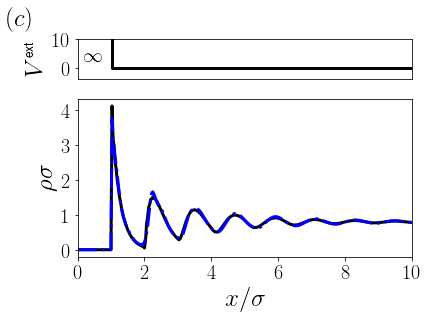

In [41]:
grid = plt.GridSpec(4, 1, wspace=0.4, hspace=0.5)
plt.subplot(grid[0, 0])

plt.text(0.2,2,r"$\infty$",fontsize=20)
plt.plot(x,Vext,"k-",lw=3)
plt.ylim([-4,10])
plt.xlim([0,10])
plt.text(-2.1,15,r"$(c)$",fontsize=25)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.yticks(fontsize=20)

plt.ylabel(r"$V^{\mbox{\large  ext}}$",fontsize=25)

plt.subplot(grid[1:, 0])
plt.plot(x,rho_test,"k-",lw=3,label="ground truth")
plt.plot(x,rho,"b-.",lw=3,ms=2,label="ML")
plt.xlim([0,10])

#plt.legend()
plt.ylabel(r"$\rho\sigma$",fontsize=25)
plt.xlabel(r"$x/\sigma$",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks([0,1,2,3,4],fontsize=20)
plt.savefig("rho_HR_outside.eps",format="eps",bbox_inches='tight')